# Template example

The strategy we use here is to associate a kernel with every point (m,n) in Matrix C. The source code for the example is in [template.cpp](template.cpp) and the kernel is in [kernels.c](kernels.c). Click on the link and open up the file in a different window.

## Running the example program

We first run the application then understand how it works.

### Run the program

In [2]:
!make clean; make; ./template.exe

rm -r *.exe
g++ -std=c++11 -g -O2 -fopenmp -I/usr/include -I../include -L/usr/lib/x86_64-linux-gnu template.cpp\
	-o template.exe -lOpenCL
In file included from template.cpp:12:
../include/cl_helper.hpp: In function ‘_cl_command_queue** h_create_command_queues(_cl_device_id**, _cl_context**, cl_uint, cl_uint, cl_bool, cl_bool)’:
../include/cl_helper.hpp:330:49: warning: ‘_cl_command_queue* clCreateCommandQueue(cl_context, cl_device_id, cl_command_queue_properties, cl_int*)’ is deprecated []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wdeprecated-declarations-Wdeprecated-declarations]8;;]
  330 |         command_queues[n] = clCreateCommandQueue(
      |                             ~~~~~~~~~~~~~~~~~~~~^
  331 |             contexts[n % num_devices],
      |             ~~~~~~~~~~~~~~~~~~~~~~~~~~           
  332 |             devices[n % num_devices],
      |             ~~~~~~~~~~~~~~~~~~~~~~~~~            
  333 |             queue_properties,
      |           

### Read in the answer and verify results

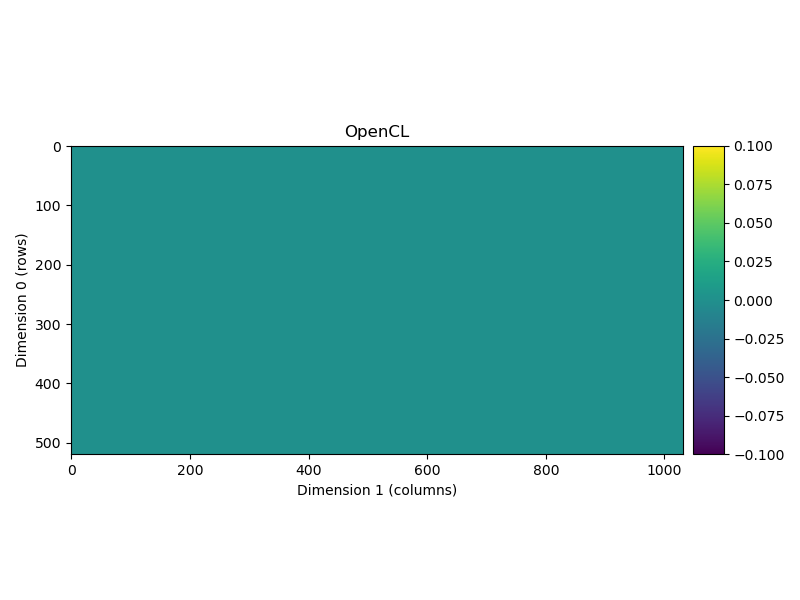

In [8]:
%matplotlib widget

# Import axes machinery
import numpy as np
import sys, os
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Import the py_helper machinery
sys.path.insert(0, os.path.abspath("../include"))
import py_helper
defines=py_helper.load_defines("mat_size.hpp")

# Get some definitions
NROWS_C = defines["NROWS_C"]
NCOLS_C = defines["NCOLS_C"]

# Data type to use
dtype = np.float32

# Read in the output from OpenCL
C_ocl = np.fromfile("array_C.dat", dtype=dtype).reshape((NROWS_C, NCOLS_C))

# Make plots
fig, axes = plt.subplots(1, 1, figsize=(8,6), sharex=True, sharey=True)

# Data to plot
data = [C_ocl]

# Labels to plot
labels = ["OpenCL"]

for n, value in enumerate(data):
    # Plot the graph
    ax = axes
    im = ax.imshow(value)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    # Set labels on things
    ax.set_xlabel("Dimension 1 (columns)")
    ax.set_ylabel("Dimension 0 (rows)")
    ax.set_title(labels[n])

    # Put a color bar on the plot
    plt.colorbar(mappable=im, cax=cax)

fig.tight_layout()
plt.show()